<a href="https://colab.research.google.com/github/jhon-aparicio/DataSet/blob/main/U_Net5.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###PYTORCH CON U-NET 
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset, random_split
#
import PIL
from PIL import Image
#
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/jhon-aparicio/semanticSegmentation.git

fatal: destination path 'semanticSegmentation' already exists and is not an empty directory.


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
PATH = '/content/semanticSegmentation/dataset/persona/'
TRAIN_PATH = '/content/semanticSegmentation/dataset/persona/train2/'
TRAIN_MASKS_PATH = '/content/semanticSegmentation/dataset/persona/segmentadas/'
TEST_PATH = '/content/semanticSegmentation//dataset//persona/val2/'

In [6]:
class Person_Dataset(Dataset):
    def __init__(self, data, masks=None, img_transforms=None, mask_transforms=None):
        '''
        data - train data path
        masks - train masks path
        '''
        self.train_data = data
        self.train_masks = masks
        
        self.img_transforms = img_transforms
        self.mask_transforms = mask_transforms
        
        self.images = sorted(os.listdir(self.train_data))
        self.masks = sorted(os.listdir(self.train_masks))
        
    def __len__(self):
        if self.train_masks is not None:
            assert len(self.images)==len(self.masks), 'not the same number of images and masks'
        return len(self.images)
        
    def __getitem__(self, idx):
        image_name = os.path.join(self.train_data, self.images[idx])
        img = Image.open(image_name)
        trans = T.ToTensor()
        if self.img_transforms is not None:
            img = self.img_transforms(img)
        else:
            img =trans(img)
            img = torch.narrow(img, 1, 0, 3)
        
        if self.train_masks is not None:
            mask_name = os.path.join(self.train_masks, self.masks[idx])
            mask = Image.open(mask_name)
            if self.mask_transforms is not None:
                mask = self.mask_transforms(mask)
            else:
                mask = trans(mask)
            
            mask_max = mask.max().item()
            mask /= mask_max
        else:
            return img 

        return img, mask 

In [7]:
transform_data = T.Compose([
                T.Resize([224, 224]),
                T.ToTensor()] )

In [8]:
full_dataset = Person_Dataset(TRAIN_PATH,
                           TRAIN_MASKS_PATH,
                           img_transforms=transform_data,
                           mask_transforms=transform_data)

In [9]:
BATCH_SIZE = 4
TRAIN_SIZE = int(len(full_dataset)*0.8)
VAL_SIZE = len(full_dataset) - TRAIN_SIZE

print(TRAIN_SIZE, VAL_SIZE)

41 11


In [10]:
train_dataset, val_dataset = random_split(full_dataset, [TRAIN_SIZE, VAL_SIZE])
print(len(train_dataset), len(val_dataset))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
for batch_idx, (inputs, targets) in enumerate(train_loader):
    print(f'Batch {batch_idx}: inputs={inputs.shape}, targets={targets.shape}')

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

41 11
Batch 0: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 1: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 2: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 3: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 4: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 5: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 6: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 7: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 8: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 9: inputs=torch.Size([4, 4, 224, 224]), targets=torch.Size([4, 1, 224, 224])
Batch 10: inputs=torch.Size([1, 4, 224, 224]), targets=torch.Size([1, 1, 224, 224])


In [11]:
imgs, masks = next(iter(train_loader))
print(imgs.shape, masks.shape)
#imgs = torch.narrow(imgs, 1, 0, 3)
#print(imgs.shape)
for i, (x, y) in enumerate(train_loader):
    x = torch.narrow(x, 1, 0, 3)
    print(i, x.shape, y.shape)
    if i==9: break

torch.Size([4, 4, 224, 224]) torch.Size([4, 1, 224, 224])
0 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
4 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
5 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
6 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
7 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
8 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])
9 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 224, 224])


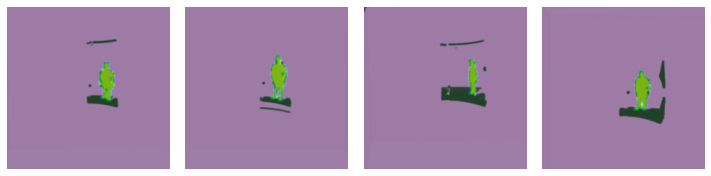

In [12]:
imgs, masks = next(iter(train_loader))
def plot_mini_batch(imgs, masks):
    plt.figure(figsize=(20,10))
    for i in range(BATCH_SIZE):
        plt.subplot(4, 8, i+1)
        img=imgs[i,...].permute(1,2,0).numpy()
        mask = masks[i, ...].permute(1,2,0).numpy()
        plt.imshow(img)
        plt.imshow(mask, alpha=0.5)
        
        plt.axis('Off')
    plt.tight_layout()
    plt.show()

plot_mini_batch(imgs, masks)

In [13]:
def accuracy(model, loader):
    correct = 0
    intersection = 0
    denom = 0
    union = 0
    total = 0
    cost = 0.
    model = model.to(device=device)
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype = torch.float32)
            x = torch.narrow(x, 1, 0, 3)
            y = y.to(device=device, dtype = torch.long).squeeze(1)
            scores = model(x)
            cost += (F.cross_entropy(scores, y)).item()
            # standard accuracy not optimal
            preds = torch.argmax(scores, dim=1)
            correct += (preds == y).sum()
            total += torch.numel(preds)
            #dice coefficient
            intersection += (preds*y).sum()
            denom += (preds + y).sum()
            dice = 2*intersection/(denom + 1e-8)
            #intersection over union
            union += (preds + y - preds*y).sum()
            iou = (intersection)/(union + 1e-8)
            
        return cost/len(loader), float(correct)/total, dice, iou

In [14]:
def find_lr(model, optimiser, start_val = 1e-6, end_val = 1, beta = 0.99, loader = train_loader):
    n = len(loader) - 1
    factor = (end_val / start_val)**(1/n)
    lr = start_val
    optimiser.param_groups[0]['lr'] = lr #this allows you to update the learning rate
    avg_loss, loss, acc = 0., 0., 0.
    lowest_loss = 0.
    batch_num = 0
    losses = []
    log_lrs = []
    accuracies = []
    model = model.to(device=device)
    for i, (x, y) in enumerate(loader, start=1):
        x = x.to(device = device, dtype = torch.float32)
        x = torch.narrow(x, 1, 0, 3)
        y = y.to(device = device, dtype = torch.long).squeeze(1)
        optimiser.zero_grad()
        scores = model(x)
        cost = F.cross_entropy(input=scores, target=y)
        loss = beta*loss + (1-beta)*cost.item()
        avg_loss = loss/(1 - beta**i)
        
        preds = torch.argmax(scores, dim=1)
        acc_ = (preds == y).sum()/torch.numel(scores)
        if i > 1 and avg_loss > 4 * lowest_loss:
            print(f'from here{i, cost.item()}')
            return log_lrs, losses, accuracies
        if avg_loss < lowest_loss or i == 1:
            lowest_loss = avg_loss

        accuracies.append(acc_.item())
        losses.append(avg_loss)
        log_lrs.append(lr)
        #step
        cost.backward()
        optimiser.step()
        #update lr
        print(f'cost:{cost.item():.4f}, lr: {lr:.4f}, acc: {acc_.item():.4f}')
        lr *= factor
        optimiser.param_groups[0]['lr'] = lr
        
    return log_lrs, losses, accuracies

In [15]:
def evaluate(model, loader):
    model.eval()
    model.to(device=device)
    with torch.no_grad():
        true_positives = 0
        false_positives = 0
        false_negatives = 0
        total = 0
        cost = 0
        for x, y in loader:
            x = x.to(device=device, dtype=torch.float32)
            x = torch.narrow(x, 1, 0, 3)
            y = y.to(device=device, dtype=torch.long).squeeze(1)
            scores = model(x)
            cost += (F.cross_entropy(scores, y)).item()
            preds = torch.argmax(scores, dim=1)
            true_positives += ((preds == 1) & (y == 1)).sum().item()
            false_positives += ((preds == 1) & (y == 0)).sum().item()
            false_negatives += ((preds == 0) & (y == 1)).sum().item()
            total += torch.numel(preds)
        accuracy = true_positives / total
        recall = true_positives / (true_positives + false_negatives)
        precision = true_positives / (true_positives + false_positives)
        if (precision + recall) ==0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)
        true_negatives = total - true_positives - false_positives - false_negatives
        confusion_matrix = [[true_positives, false_positives], [false_negatives, true_negatives]]
        print("Confusion Matrix:")
        print(confusion_matrix)
        return cost / len(loader), accuracy, recall, precision, f1_score, confusion_matrix

In [16]:
import torch
from sklearn.metrics import confusion_matrix
def lift(model, loader):
    thresholds = torch.arange(0, 1.01, 0.01)
    tprs = []
    fprs = []
    for threshold in thresholds:
        true_positives = 0
        false_positives = 0
        false_negatives = 0
        true_negatives = 0
        total = 0
        for x, y in loader:
            x = x.to(device=device, dtype=torch.float32)
            x = torch.narrow(x, 1, 0, 3)
            y = y.to(device=device, dtype=torch.long).squeeze(1)
            scores = model(x)
            preds = torch.where(scores[:, 1] > threshold, torch.tensor(1).to(device=device), torch.tensor(0).to(device=device))
            true_positives += ((preds == 1) & (y == 1)).sum().item()
            false_positives += ((preds == 1) & (y == 0)).sum().item()
            false_negatives += ((preds == 0) & (y == 1)).sum().item()
            true_negatives += ((preds == 0) & (y == 0)).sum().item()
            total += torch.numel(preds)
        tpr = true_positives / (true_positives + false_negatives)
        fpr = false_positives / (false_positives + true_negatives)
        tprs.append(tpr)
        fprs.append(fpr)
    return fprs, tprs

In [17]:
def train(model, optimiser, scheduler = None, epochs = 5000, store_every = 25):
    model = model.to(device=device)
    for epoch in range(epochs):
        train_correct_num = 0
        train_total = 0
        train_cost_acum = 0.
        for mb, (x, y) in enumerate(train_loader, start=1):
            model.train()
            x = x.to(device=device, dtype=torch.float32)
            x = torch.narrow(x, 1, 0, 3)
            y = y.to(device=device, dtype=torch.long).squeeze(1)
            scores = model(x)
            cost = F.cross_entropy(input=scores, target=y)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()
            
            if scheduler: 
                scheduler.step()
                
            train_predictions = torch.argmax(scores, dim=1)
            train_correct_num += (train_predictions == y).sum()
            train_total += torch.numel(train_predictions)
            train_cost_acum += cost.item()
            if mb%store_every == 0:
                val_cost, val_acc, dice, iou = accuracy(model, val_loader)
                train_acc = float(train_correct_num)/train_total
                train_cost_every = float(train_cost_acum)/mb
                loss, accuracy2, recall, precision, f1_score, confusion_matrix = evaluate(model, val_loader)
                print(f'epoch: {epoch}, mb: {mb}, train cost: {train_cost_every:.4f}, val cost: {val_cost:.4f},'
                      f'train acc: {train_acc:.4f}, val acc: {val_acc:.4f},'
                      f'dice: {dice}, iou: {iou}')
            else:
                val_cost, val_acc, dice, iou = accuracy(model, val_loader)
                train_acc = float(train_correct_num)/train_total
                train_cost_every = float(train_cost_acum)/mb
                print(f'epoch: {epoch}, mb: {mb}, train cost: {train_cost_every:.4f}, val cost: {val_cost:.4f},'
                      f'train acc: {train_acc:.4f}, val acc: {val_acc:.4f},'
                      f'dice: {dice}, iou: {iou}')              
   

In [18]:
class Conv_3_k(nn.Module):
    def __init__(self, channels_in, channels_out):
        super().__init__()
        self.conv1 = nn.Conv2d(channels_in, channels_out, kernel_size=3, stride=1, padding=1)
    def forward(self, x):
        return self.conv1(x)

In [19]:
class Double_Conv(nn.Module):
    '''
    Double convolution block for U-Net
    '''
    def __init__(self, channels_in, channels_out):
        super().__init__()
        self.double_conv = nn.Sequential(
                           Conv_3_k(channels_in, channels_out),
                           nn.BatchNorm2d(channels_out),
                           nn.ReLU(),
            
                           Conv_3_k(channels_out, channels_out),
                           nn.BatchNorm2d(channels_out),
                           nn.ReLU(),
                            )
    def forward(self, x):
        return self.double_conv(x)
    
class Down_Conv(nn.Module):
    '''
    Down convolution part
    '''
    def __init__(self, channels_in, channels_out):
        super().__init__()
        self.encoder = nn.Sequential(
                        nn.MaxPool2d(2,2),
                        Double_Conv(channels_in, channels_out)
                        )
    def forward(self, x):
        return self.encoder(x)
    
class Up_Conv(nn.Module):
    '''
    Up convolution part
    '''
    def __init__(self,channels_in, channels_out):
        super().__init__()
        self.upsample_layer = nn.Sequential(
                        nn.Upsample(scale_factor=2, mode='bicubic'),
                        nn.Conv2d(channels_in, channels_in//2, kernel_size=1, stride=1)
                        )
        self.decoder = Double_Conv(channels_in, channels_out)
    
    def forward(self, x1, x2):
        '''
        x1 - upsampled volume
        x2 - volume from down sample to concatenate
        '''
        x1 = self.upsample_layer(x1)
        x = torch.cat([x2, x1],dim=1)
        return self.decoder(x)
    
class UNET(nn.Module):
    '''
    UNET model
    '''
    def __init__(self, channels_in, channels, num_classes):
        super().__init__()
        self.first_conv = Double_Conv(channels_in, channels) #64, 224, 224
        self.down_conv1 = Down_Conv(channels, 2*channels) # 128, 112, 112
        self.down_conv2 = Down_Conv(2*channels, 4*channels) # 256, 56, 56
        self.down_conv3 = Down_Conv(4*channels, 8*channels) # 512, 28, 28
        
        self.middle_conv = Down_Conv(8*channels, 16*channels) # 1024, 14, 14 
        
        self.up_conv1 = Up_Conv(16*channels, 8*channels)
        self.up_conv2 = Up_Conv(8*channels, 4*channels)
        self.up_conv3 = Up_Conv(4*channels, 2*channels)
        self.up_conv4 = Up_Conv(2*channels, channels)
        
        self.last_conv = nn.Conv2d(channels, num_classes, kernel_size=1, stride=1)
        
    def forward(self, x):
        x1 = self.first_conv(x)
        x2 = self.down_conv1(x1)
        x3 = self.down_conv2(x2)
        x4 = self.down_conv3(x3)
        
        x5 = self.middle_conv(x4)
        
        u1 = self.up_conv1(x5, x4)
        u2 = self.up_conv2(u1, x3)
        u3 = self.up_conv3(u2, x2)
        u4 = self.up_conv4(u3, x1)
        
        return self.last_conv(u4)

In [20]:
torch.manual_seed(42)
model = UNET(3, 4, 2)
optimiser_unet = torch.optim.SGD(model.parameters(),
                                 lr=0.01, momentum=0.95,
                                 weight_decay=1e-4)

lg_lr, losses, accuracies = find_lr(model, optimiser_unet, start_val=1e-6, end_val=10)

cost:0.8995, lr: 0.0000, acc: 0.0683
cost:0.9001, lr: 0.0000, acc: 0.0629
cost:0.9006, lr: 0.0000, acc: 0.0620
cost:0.8940, lr: 0.0001, acc: 0.0756
cost:0.8895, lr: 0.0006, acc: 0.0739
cost:0.8792, lr: 0.0032, acc: 0.0859
cost:0.8458, lr: 0.0158, acc: 0.1156
cost:0.7216, lr: 0.0794, acc: 0.1833
cost:0.3177, lr: 0.3981, acc: 0.4960
cost:0.0343, lr: 1.9953, acc: 0.4983
cost:0.2449, lr: 10.0000, acc: 0.4978


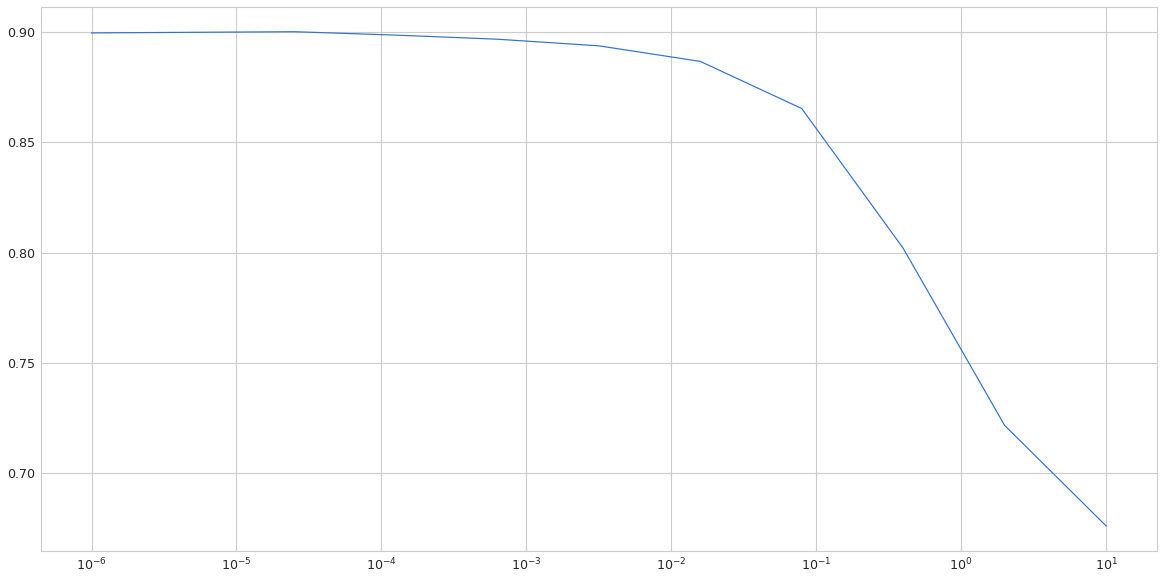

In [21]:
# plot loss vs learning rate
f1, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(lg_lr, losses)
ax1.set_xscale('log')
plt.show()

In [22]:
torch.manual_seed(42)
model = UNET(3, 4, 2)
epochs = 750
optimiser_unet = torch.optim.SGD(model.parameters(),
                                 lr=0.01, momentum=0.95,
                                 weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser_unet, 
                                                max_lr = 1e0,
                                                steps_per_epoch=len(train_loader),
                                                epochs=epochs, pct_start=0.43, div_factor=10, final_div_factor=1000,
                                                three_phase=True)

In [27]:
train(model, optimiser_unet, scheduler, epochs)
loss, accuracy2, recall, precision, f1_score, confusion_matrix = evaluate(model, val_loader)
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.4f}".format(accuracy2))
print("Recall: {:.4f}".format(recall))
print("Precision: {:.4f}".format(precision))
print("F1 Score: {:.4f}".format(f1_score))

Se han truncado las últimas 5000 líneas del flujo de salida.
epoch: 296, mb: 2, train cost: 0.0039, val cost: 0.0036,train acc: 0.9987, val acc: 0.9988,dice: 0.8527198433876038, iou: 0.7432533502578735
epoch: 296, mb: 3, train cost: 0.0038, val cost: 0.0036,train acc: 0.9988, val acc: 0.9986,dice: 0.8434466123580933, iou: 0.7292759418487549
epoch: 296, mb: 4, train cost: 0.0038, val cost: 0.0038,train acc: 0.9987, val acc: 0.9984,dice: 0.8260700106620789, iou: 0.7036791443824768
epoch: 296, mb: 5, train cost: 0.0037, val cost: 0.0038,train acc: 0.9987, val acc: 0.9984,dice: 0.8257444500923157, iou: 0.7032067775726318
epoch: 296, mb: 6, train cost: 0.0037, val cost: 0.0037,train acc: 0.9987, val acc: 0.9985,dice: 0.8382236361503601, iou: 0.7215017080307007
epoch: 296, mb: 7, train cost: 0.0037, val cost: 0.0036,train acc: 0.9987, val acc: 0.9985,dice: 0.8411694765090942, iou: 0.7258779406547546
epoch: 296, mb: 8, train cost: 0.0036, val cost: 0.0034,train acc: 0.9987, val acc: 0.9987,di

In [28]:
torch.save(model.state_dict(), 'model_trained8_02.pth')

Confusion Matrix:
[[1994, 423], [283, 549236]]


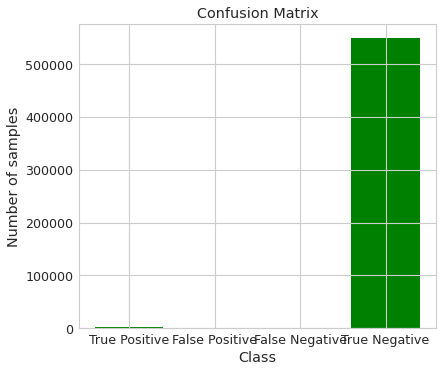

In [29]:
print("Confusion Matrix:")
print(confusion_matrix)
tp, fp = confusion_matrix[0]
fn, tn = confusion_matrix[1]

# Crear una lista con los nombres de las clases
class_names = ["True Positive", "False Positive", "False Negative", "True Negative"]

# Crear una figura y un eje para el gráfico de barras
fig, ax = plt.subplots()

# Crear el gráfico de barras
ax.bar(class_names, [tp, fp, fn, tn], color=["green", "red", "red", "green"])

# Configurar las etiquetas de los ejes y el título del gráfico
ax.set_xlabel("Class")
ax.set_ylabel("Number of samples")
ax.set_title("Confusion Matrix")

# Mostrar el gráfico
plt.show()

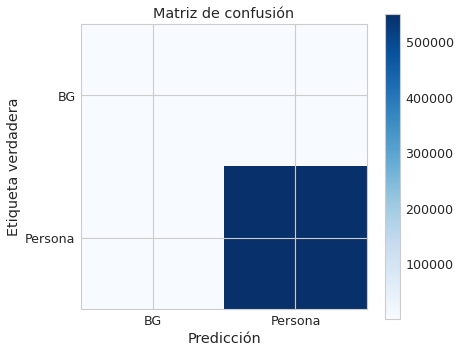

In [31]:
import matplotlib.pyplot as plt
confusion_matrix2=[[1577, 294], [578, 5487]]
# Graficar la matriz de confusión
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
class_names = ['BG','Persona']
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.show()

[[1994, 423], [283, 549236]]


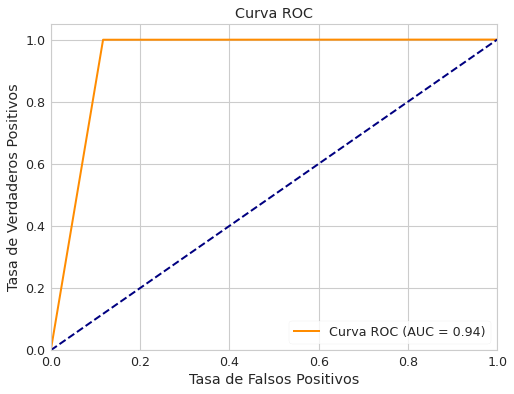

In [32]:
####CURVAS ROC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

cm = confusion_matrix
print(cm)
cm = np.array(cm)

y_true = np.concatenate([np.zeros(cm[0, 0] + cm[0, 1]), np.ones(cm[1, 0] + cm[1, 1])])
y_scores = np.concatenate([np.zeros(cm[0, 0]), np.ones(cm[1, 0]), np.zeros(cm[0, 1]), np.ones(cm[1, 1])])

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de clasificación
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

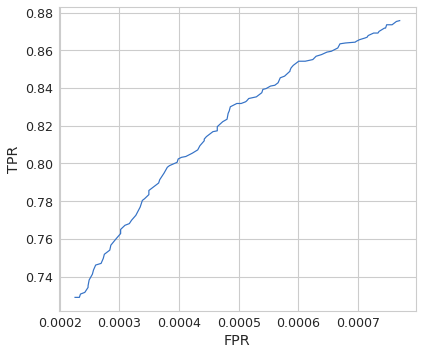

In [33]:
fprs, tprs = lift(model, val_loader)
import matplotlib.pyplot as plt
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

torch.Size([4, 224, 224])


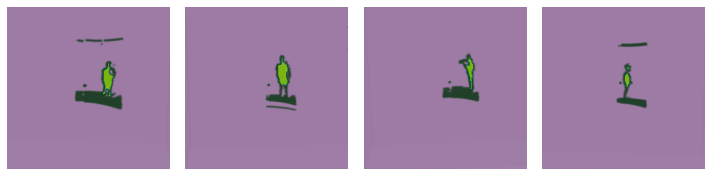

In [34]:
imgs_val, masks_val = next(iter(val_loader))
imgs_val = imgs_val.to(device, dtype=torch.float32)
imgs_val = torch.narrow(imgs_val, 1, 0, 3)
model = model.to(device)
with torch.no_grad():
    scores = model(imgs_val)
    preds = torch.argmax(scores, dim=1).float()

imgs_val = imgs_val.cpu()
preds = preds.cpu()
print(preds.shape)
plot_mini_batch(imgs_val, preds.unsqueeze(1))

In [ ]:
###PRUEBA // TESTEO
test_set = Person_Dataset(TEST_PATH, img_transforms=transform_data)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)

In [23]:
import numpy as np
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, random_split
metrics = {'loss': [], 'accuracy': []}

def cross_validation(model, dataset, optimiser, scheduler, epochs, folds=5):
    # Definir las métricas que quieres evaluar en cada fold
    # En este caso, vamos a usar la pérdida (loss) y la precisión (accuracy)
    #metrics = {'loss': [], 'accuracy': []}
    
    # Dividir el conjunto de datos en folds
    folds = KFold(n_splits=folds, shuffle=True, random_state=42)
    
    # Iterar sobre cada fold
    for i, (train_idx, val_idx) in enumerate(folds.split(dataset)):
        print(f'Fold {i+1}')
        
        # Dividir el conjunto de datos en entrenamiento y validación
        train_dataset = torch.utils.data.Subset(dataset, train_idx)
        val_dataset = torch.utils.data.Subset(dataset, val_idx)
        
        # Crear los generadores de datos para entrenamiento y validación
        train_generator = DataLoader(train_dataset, batch_size=BATCH_SIZE)
        val_generator = DataLoader(val_dataset, batch_size=BATCH_SIZE)
        torch.manual_seed(42)
        model = UNET(3, 4, 2)
        epochs = 750
        optimiser_unet = torch.optim.SGD(model.parameters(),
                                 lr=0.01, momentum=0.95,
                                 weight_decay=1e-4)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser_unet, 
                                                max_lr = 1e0,
                                                steps_per_epoch=len(train_loader),
                                                epochs=epochs, pct_start=0.43, div_factor=10, final_div_factor=1000,
                                                three_phase=True)
        # Entrenar el modelo con el conjunto de datos de entrenamiento
        train(model, optimiser, scheduler, epochs)
        
        # Evaluar el modelo con el conjunto de datos de validación
        loss, accuracy2, recall, precision, f1_score, confusion_matrix = evaluate(model, val_loader)
        print(f'Loss: {loss:.4f}, Accuracy: {accuracy2:.4f}')
        
        # Guardar las métricas del fold
        metrics['loss'].append(loss)
        metrics['accuracy'].append(accuracy2)
    
    # Calcular las métricas promedio de todos los folds
    mean_loss = np.mean(metrics['loss'])
    mean_accuracy = np.mean(metrics['accuracy'])
    
    print(f'Mean Loss: {mean_loss:.4f}, Mean Accuracy: {mean_accuracy:.4f}')
    
    return mean_loss, mean_accuracy

epochs = 750  # número de epochs
batch_size = 4  # tamaño de batch

mean_loss, mean_accuracy = cross_validation(model, full_dataset, optimiser_unet, scheduler, epochs, folds=5)
print(f'Mean Loss: {mean_loss:.4f}, Mean Accuracy: {mean_accuracy:.4f}')


Fold 1
epoch: 0, mb: 1, train cost: 0.8995, val cost: 0.8991,train acc: 0.1366, val acc: 0.1301,dice: 0.007036048918962479, iou: 0.0035304445773363113


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Se han truncado las últimas 5000 líneas del flujo de salida.
epoch: 295, mb: 9, train cost: 0.8980, val cost: 0.8999,train acc: 0.1332, val acc: 0.1290,dice: 0.007014688104391098, iou: 0.003519688965752721
epoch: 295, mb: 10, train cost: 0.8979, val cost: 0.8993,train acc: 0.1335, val acc: 0.1281,dice: 0.0070074512623250484, iou: 0.0035160447005182505
epoch: 295, mb: 11, train cost: 0.8977, val cost: 0.8997,train acc: 0.1334, val acc: 0.1271,dice: 0.007003456354141235, iou: 0.0035140332765877247
epoch: 296, mb: 1, train cost: 0.8953, val cost: 0.8989,train acc: 0.1370, val acc: 0.1303,dice: 0.007045341655611992, iou: 0.003535124007612467
epoch: 296, mb: 2, train cost: 0.8973, val cost: 0.8999,train acc: 0.1326, val acc: 0.1280,dice: 0.006974090822041035, iou: 0.0034992473665624857
epoch: 296, mb: 3, train cost: 0.8956, val cost: 0.9001,train acc: 0.1390, val acc: 0.1260,dice: 0.00697469525039196, iou: 0.0034995516762137413
epoch: 296, mb: 4, train cost: 0.8973, val cost: 0.8998,train a

{'loss': [0.9002532561620077, 0.9002532561620077, 0.9002532958984375, 0.9002532958984375, 0.9002532958984375], 'accuracy': [0.003078255449907236, 0.003078255449907236, 0.003078255449907236, 0.003078255449907236, 0.003078255449907236]}


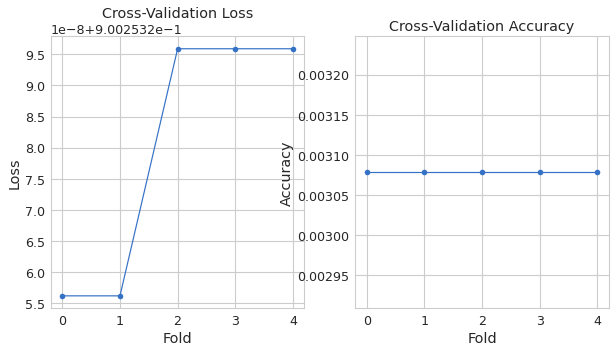

In [24]:
import matplotlib.pyplot as plt
print(metrics)
# Obtener los valores de loss y accuracy de cada fold
loss_values = metrics['loss']
accuracy_values = metrics['accuracy']

# Crear una figura y dos subplots para loss y accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la curva de loss
ax1.plot(loss_values, marker='o')
ax1.set_title('Cross-Validation Loss')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Loss')

# Graficar la curva de accuracy
ax2.plot(accuracy_values, marker='o')
ax2.set_title('Cross-Validation Accuracy')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Accuracy')

# Mostrar la figura
plt.show()


In [ ]:
imgs_test = next(iter(test_loader))
imgs_test = imgs_test.to(device, dtype=torch.float32)
imgs_test = torch.narrow(imgs_test, 1, 0, 3)
model = model.to(device)
with torch.no_grad():
    scores = model(imgs_test)
    preds = torch.argmax(scores, dim=1).float()

imgs_test = imgs_test.cpu()
preds = preds.cpu()
print(preds.shape)
plot_mini_batch(imgs_test, preds.unsqueeze(1))

torch.Size([4, 4, 224, 224])


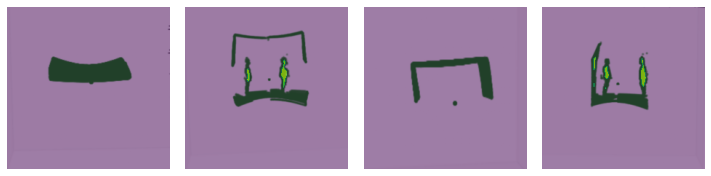

torch.Size([4, 4, 224, 224])


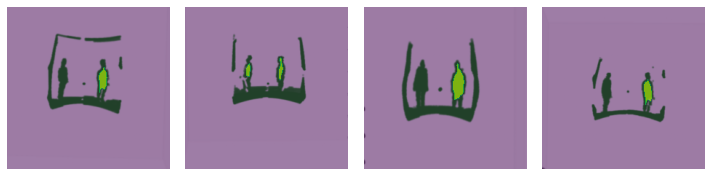

torch.Size([4, 4, 224, 224])


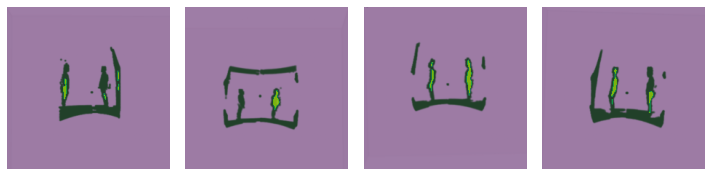

torch.Size([3, 4, 224, 224])


IndexError: ignored

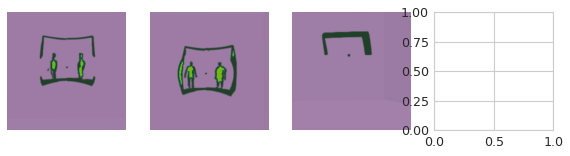

In [ ]:
###PARA IMPRIMIR TODO EL DATASET
model = model.to(device)
with torch.no_grad():
    for batch in test_loader:
        imgs_test = batch.to(device, dtype=torch.float32)
        print(imgs_test.shape)
        imgs_test = torch.narrow(imgs_test, 1, 0, 3)
        
        scores = model(imgs_test)
        preds = torch.argmax(scores, dim=1).float()

        imgs_test = imgs_test.cpu()
        preds = preds.cpu()
        plot_mini_batch(imgs_test, preds.unsqueeze(1))

torch.Size([1, 3, 224, 224])


IndexError: ignored

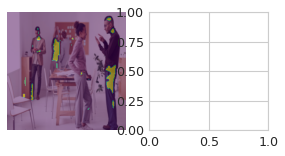

In [ ]:
###PRUEBA // TESTEO
test_set2 = Person_Dataset(TEST2_PATH, img_transforms=transform_data)
test_loader2 = DataLoader(test_set2, batch_size=BATCH_SIZE, shuffle=True)
model = model.to(device)
with torch.no_grad():
    for batch in test_loader2:
        imgs_test = batch.to(device, dtype=torch.float32)
        print(imgs_test.shape)
        imgs_test = torch.narrow(imgs_test, 1, 0, 3)
        
        scores = model(imgs_test)
        preds = torch.argmax(scores, dim=1).float()

        imgs_test = imgs_test.cpu()
        preds = preds.cpu()
        plot_mini_batch(imgs_test, preds.unsqueeze(1))

In [ ]:
#!pip install opencv-python
import cv2
import torch
import numpy as np
print("hola si")
import torch
import torchvision.models as models

# Define the model architecture
model = models.segmentation.fcn_resnet101(pretrained=False, progress=True, num_classes=2)

# Load the state dictionary of the trained model
state_dict = torch.load('C://Users/jhona/OneDrive/Documents/semanticSegmentation/entrenamientos/model_trainedS.pth', map_location=torch.device('cpu'))

# Load the state dictionary into the model
#model.load_state_dict(state_dict)

# Set the model to evaluation mode
model.eval()
# Configurar la cámara
cap = cv2.VideoCapture(0)

while True:
    # Capturar una imagen de la cámara
    ret, frame = cap.read()
    
    if ret:
        # Preprocesar la imagen
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (256, 256))
        frame = np.transpose(frame, (2, 0, 1))
        frame = torch.from_numpy(frame).unsqueeze(0).float()

        # Obtener la predicción del modelo
        with torch.no_grad():
            output = model(frame)
            pred = np.argmax(output['out'].numpy()[0])
            #pred = torch.argmax(output['out'], dim=1).item()
            #pred = torch.argmax(output, dim=1).item()

        # Mostrar la imagen con la predicción
        cv2.putText(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR), f'Prediction: {pred}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        #cv2.putText(frame, f'Prediction: {pred}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        #cv2.imshow('original', frame)
        #cv2.waitKey(1)
        cv2.imshow('frame', cv2.cvtColor(np.transpose(np.array(frame[0]), (1, 2, 0)), cv2.COLOR_RGB2BGR))
        #cv2.imshow('frame', cv2.cvtColor(np.array(frame[0]), cv2.COLOR_RGB2BGR))
        #cv2.imshow('frame', cv2.cvtColor(frame.numpy()[0], cv2.COLOR_RGB2BGR))

    # Salir si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar los recursos
cap.release()
cv2.destroyAllWindows()

hola si


In [ ]:
#!pip install ipywebrtc

import torch
import numpy as np
from ipywebrtc import CameraStream, ImageRecorder

# Cargar el modelo entrenado previamente
#model = torch.load('mi_modelo.pt')

# Configurar la transmisión de la cámara
stream = CameraStream(constraints={'audio': False, 'video': True})

# Configurar el grabador de imágenes
recorder = ImageRecorder(format='jpeg', stream=stream)

# Obtener una imagen de la cámara web y hacer la predicción
def on_image_recorder_data(change):
    img = change['new']
    img = np.array(img.data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = np.transpose(img, (2, 0, 1))
    img = torch.from_numpy(img).unsqueeze(0).float()
    with torch.no_grad():
        output = model(img)
        pred = torch.argmax(output, dim=1).item()
    print(f'Prediction: {pred}')

# Asignar la función de manejo de datos al grabador de imágenes
recorder.observe(on_image_recorder_data, names='data')

# Mostrar la transmisión de la cámara web
stream

CameraStream(constraints={'audio': False, 'video': True})